In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split   # to split the data
from sklearn.linear_model import LogisticRegression    # for logistic regression
from sklearn import metrics                            # to create confusion matrix


In [2]:
def df_transformation(df):
    df_temp = df[features]
    df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    output = df_temp.groupby(by=["datetime"], dropna=False).mean().reset_index()
    
    return output 

In [3]:
# Create a custom function for data transformation

features = ['datetime',
            'latitude',
            'longitude',
            'absoluteAltitude',
            'magneticHeading',
            'trueHeading',
            'groundSpeed',
            'trueAirspeed',
            'pitch',
            'roll',
            'yaw',
            'angleOfAttack',
            'flightPathAngle',
            'verticalFlightPathAngle',
            'horizontalFlightPathAngle',
            'rollAcceleration',
            'pitchAcceleration',
            'yawAcceleration',
            'e1N1ng',
            'e2N1ng',
            'e1N2nf',
            'e2N2nf',
            'mainRotorRpm',
            'tailRotorRpm',
            'mainRotorTorque',
            'e1Itt',
            'e2Itt',
            'mainRotorInducedInflow',
            'flightDirectorPitch',
            'flightDirectorRoll',
            'climbOrDescentRate',
            'hasWeightOnWheels',
            'turnRate to degPerSec',
            'cyclicPositionPitch',
            'cyclicPositionRoll',
            'collectivePosition',
            'antiTorquePedalPosition',
            'throttlePosition',
            'e1Torque',
            'e2Torque'
           ]

In [4]:
# reading files from 9/19 dataset
df1 = pd.read_csv('SimData_2022.09.19_16.00.36.csv.roar.csv',
                 parse_dates = {'datetime': ['date', 'time']},
                 low_memory=False)
df1 = df_transformation(df1)


df2 = pd.read_csv('SimData_2022.09.19_16.38.20.csv.roar.csv',
                 parse_dates = {'datetime': ['date', 'time']},
                 low_memory=False)
df2 = df_transformation(df2)


df3 = pd.read_csv('SimData_2022.09.19_17.51.37.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df3 = df_transformation(df3)



# reading files from 9/20 dataset
df4 = pd.read_csv('SimData_2022.09.20_16.22.07.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df4 = df_transformation(df4)


df5 = pd.read_csv('SimData_2022.09.20_16.28.31.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df5 = df_transformation(df5)


# reading file from 9/22 dataset
df6 = pd.read_csv('SimData_2022.09.22_17.11.56.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df6 = df_transformation(df6)


# reading file from 10/06 dataset
df7 = pd.read_csv('SimData_2022.10.06_09.47.22.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df7 = df_transformation(df7)


# reading files from 10/20 dataset
df8 = pd.read_csv('SimData_2022.10.20_17.19.15.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df8 = df_transformation(df8)

<ipython-input-2-4e5c128e35af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [5]:
#Combine files
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8]).reset_index()
len(df)

10950

In [6]:
#normalize values 
df_norm = df.loc[:, df.columns != 'datetime']
df_norm = (df_norm-df_norm.min())/(df_norm.max()-df_norm.min())
df_norm.insert(1, 'datetime', df[['datetime']])

# QUICK STOPS

In [8]:
# Dataframe labeling for Quick Stops 
df_qs = df_norm.copy()
df_qs['Quick_Stop'] = 0

df_qs.loc[(df_qs['datetime'].between('2022-09-19 22:00:45' , '2022-09-19 22:01:44' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-09-19 22:11:55' , '2022-09-19 22:13:21' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-09-22 21:36:30' , '2022-09-22 21:37:10' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-09-22 21:39:16' , '2022-09-22 21:39:42' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-09-22 21:40:06' , '2022-09-22 21:40:36' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-06 13:51:10' , '2022-10-06 13:51:42' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-06 14:04:58' , '2022-10-06 14:05:25' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-06 14:06:00' , '2022-10-06 14:06:20' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-06 14:08:02' , '2022-10-06 14:08:26' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:23:30' , '2022-10-20 21:23:54' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:24:55' , '2022-10-20 21:25:20' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:26:20' , '2022-10-20 21:26:46' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:27:47' , '2022-10-20 21:28:05' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:29:33' , '2022-10-20 21:29:56' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:30:50' , '2022-10-20 21:31:12' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:32:20' , '2022-10-20 21:32:40' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:33:55' , '2022-10-20 21:34:18' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:35:20' , '2022-10-20 21:35:45' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:36:45' , '2022-10-20 21:37:11' , inclusive='both')),['Quick_Stop']] = 1

In [9]:
df_qs['Quick_Stop'].value_counts()

0    10355
1      595
Name: Quick_Stop, dtype: int64

In [10]:
#call features used in model
model_features = ['hasWeightOnWheels',
                  'absoluteAltitude',
                  'groundSpeed',
                  'climbOrDescentRate',
                  'cyclicPositionPitch',
                  'cyclicPositionRoll',
                  'collectivePosition',
                  'antiTorquePedalPosition',
                  'throttlePosition',
                  'e1Torque',
                  'e2Torque'
                 ]

In [11]:
X = df_qs[model_features]
y = df_qs['Quick_Stop']

In [12]:
X.head()

,hasWeightOnWheels,absoluteAltitude,groundSpeed,climbOrDescentRate,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque
0,1.0,0.000004,0.000932,0.546666,0.821924,0.331066,0.004047,0.219376,0.072835,0.003199,0.003199
1,1.0,0.000012,0.001054,0.547029,0.681450,0.373572,0.004047,0.219376,0.399971,0.013915,0.013915
2,1.0,0.000014,0.000125,0.546796,0.674844,0.370517,0.004047,0.219357,0.877563,0.090793,0.090793
3,1.0,0.000014,0.000035,0.546568,0.676112,0.366596,0.004047,0.219281,1.000000,0.244604,0.244604
4,1.0,0.000014,0.000017,0.546523,0.676265,0.366036,0.004047,0.218942,1.000000,0.444592,0.444592


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Quick_Stop, dtype: int64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [15]:
LR = LogisticRegression()    # Bring empty logistic regression model

In [16]:
LR.fit(x_train,y_train)      # Train the model with training data

LogisticRegression()

In [17]:
y_pred_LR = LR.predict(x_test)    # Get predicted y from the logistic regression model

In [18]:
# Get the classification accuracy, Recall, and Presicion with the metrics function.
LR_accuracy = metrics.accuracy_score(y_pred_LR,y_test)
print('Classification accuracy = ',LR_accuracy)
print('Recall = ',metrics.recall_score(y_test, y_pred_LR))
print('Precision = ',metrics.precision_score(y_test, y_pred_LR))

Classification accuracy =  0.9461187214611873
Recall =  0.022099447513812154
Precision =  1.0


In [19]:
# Check the train data

total = 0
Quick_Stop = 0
non_Quick_Stop = 0
for i in y_train:
    if i == 1:
        Quick_Stop += 1
    else:
        non_Quick_Stop += 1
    total += 1

In [20]:
print(Quick_Stop)
print(non_Quick_Stop)
print(round(non_Quick_Stop/total,2))

414
7251
0.95


Create a balanced dataset & train Logistic regression


In [22]:
df_qs_train = df_qs[df_qs['Quick_Stop']==1]           # The original rows that have label 1
non_df_qs_train = df_qs[df_qs['Quick_Stop']==0]       # The original rows that have label 0

In [23]:
print(len(df_qs_train))
print(len(non_df_qs_train))

595
10355


In [24]:
sampled_non_df_qs = non_df_qs_train.sample(n = 595)    # Sample 595 data points from the quick stop data

In [25]:
print(len(df_qs_train))
print(len(sampled_non_df_qs))

595
595


In [26]:
merged = pd.concat([df_qs_train, sampled_non_df_qs])     # After class-balancing, concatenating both classes into 1 dataframe

In [27]:
print(len(merged))

1190


In [28]:
merged

,index,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,...,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,Quick_Stop
3173,0.218522,2022-09-19 22:00:45,0.620496,0.520354,0.020858,0.488855,0.455392,0.177889,0.179303,0.395337,...,0.0,0.326843,0.561531,0.270058,0.546607,0.373957,0.542983,0.451720,0.451720,1
3174,0.218928,2022-09-19 22:00:46,0.620492,0.520354,0.022793,0.488580,0.455116,0.192537,0.193605,0.391191,...,0.0,0.385933,0.568142,0.268968,0.542782,0.373139,0.544180,0.453602,0.453602,1
3175,0.219334,2022-09-19 22:00:47,0.620487,0.520354,0.024614,0.488998,0.455535,0.207002,0.207978,0.392070,...,0.0,0.441976,0.573673,0.276268,0.537929,0.387179,0.545072,0.455966,0.455966,1
3176,0.219740,2022-09-19 22:00:48,0.620483,0.520354,0.026540,0.492112,0.458647,0.222429,0.223836,0.389392,...,0.0,0.524060,0.571846,0.277981,0.550412,0.377349,0.551281,0.461191,0.461191,1
3177,0.220146,2022-09-19 22:00:49,0.620478,0.520354,0.029100,0.494574,0.461107,0.238762,0.240930,0.380702,...,0.0,0.560438,0.577045,0.280491,0.556116,0.362182,0.567373,0.490556,0.490556,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,0.209586,2022-09-19 20:47:03,0.615497,0.523912,0.619077,0.481411,0.447247,0.662703,0.662262,0.483051,...,0.0,0.450833,0.533181,0.342424,0.438636,0.590730,0.534101,0.416720,0.416720,0
6055,0.374492,2022-09-22 21:30:17,0.000013,0.000048,0.002793,0.882485,0.908686,0.027933,0.027966,0.531465,...,0.0,0.000000,0.657464,0.348629,0.567851,0.259398,0.555562,0.476496,0.476496,0
9247,0.308692,2022-10-20 21:33:35,0.999999,0.999811,0.065131,0.235220,0.234721,0.332162,0.332183,0.555766,...,0.0,0.474636,0.592373,0.327616,0.421096,0.438117,0.478357,0.346170,0.346170,0
8352,0.459789,2022-10-06 14:07:54,0.607234,0.524718,0.008084,0.592085,0.557848,0.322201,0.321990,0.344556,...,0.0,0.474357,0.592550,0.318382,0.491667,0.363075,0.514442,0.403586,0.403586,0


In [29]:
# Split the data into X and y
x = merged[model_features]   
y = merged['Quick_Stop']


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [31]:
total = 0
Quick_Stop = 0
non_Quick_Stop = 0
for i in y_train:
    if i == 1:
        Quick_Stop += 1
    else:
        non_Quick_Stop += 1
    total += 1
    
print(Quick_Stop)
print(non_Quick_Stop)
print(non_Quick_Stop/total)

421
412
0.49459783913565425


In [32]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred_LR = LR.predict(x_test)

LR_accuracy = metrics.accuracy_score(y_pred_LR,y_test)
print('Quick Stop accuracy = ', LR_accuracy)
print('Recall = ',metrics.recall_score(y_test, y_pred_LR))
print('Precision = ',metrics.precision_score(y_test, y_pred_LR))

Quick Stop accuracy =  0.7366946778711485
Recall =  0.8735632183908046
Precision =  0.6785714285714286


Visualize the Confusion Matrix

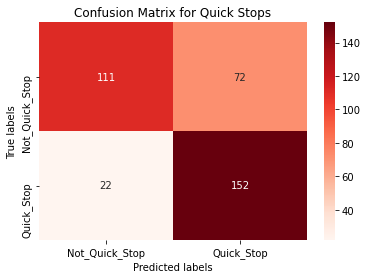

In [34]:
cm = metrics.confusion_matrix(y_test, y_pred_LR)    # Create a confusion matrix from predicted y and original y value.
                                                    
#sns.heatmap(cm,annot=True,cmap='Reds',fmt='.0f')    # Bring heatmap from seaborn and fit confusion matrix
                                                    # annot = True can show the confusion matrix values
                                                    # cmap can decide the color of heatmap
                                                    # fmt can decide the type of presentation of confusion matrix values
            
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap = 'Reds', fmt='.0f', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Quick Stops')
ax.xaxis.set_ticklabels(['Not_Quick_Stop', 'Quick_Stop']); ax.yaxis.set_ticklabels(['Not_Quick_Stop', 'Quick_Stop']);

In [35]:
y_pred_proba = LR.predict_proba(x_test)   # Get the probability of LR classification 
                                          
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred_proba[:,1])     
# Orignally predict_proba returned 2 values for both classes. 
# So, we picked second one which gives the probability of class 1

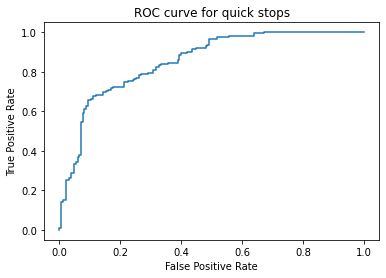

In [93]:
# Plot roc curve 
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve for quick stops')
plt.plot(false_positive_rate, true_positive_rate)  


In [37]:
# Compute AUC
auc = metrics.auc(false_positive_rate, true_positive_rate)   # metrics also provide the auc area
print("AUC for quick stops (LR) =", auc)

AUC for quick stops (LR) = 0.8537152188932856


# SURFACE TAXIS ##

In [39]:
# Dataframe labeling for Surface Taxis
df_surface = df_norm.copy()
df_surface['Surface_Taxi'] = 0

df_surface.loc[(df_surface['datetime'].between('2022-09-19 21:53:50' , '2022-09-19 21:55:55' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-09-19 22:04:00' , '2022-09-19 22:06:39' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-09-20 20:25:40' , '2022-09-20 20:27:54' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-09-22 21:16:37' , '2022-09-22 21:19:56' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-09-22 21:43:16' , '2022-09-22 21:43:41' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-10-06 13:52:16' , '2022-10-06 13:56:00' , inclusive='both')),['Surface_Taxi']] = 1


In [40]:
df_surface['Surface_Taxi'].value_counts()

0    10078
1      872
Name: Surface_Taxi, dtype: int64

In [41]:
X2 = df_surface[model_features]
y2 = df_surface['Surface_Taxi']

In [42]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 100)

In [43]:
LR2 = LogisticRegression()    # Bring empty logistic regression model

In [44]:
LR2.fit(x2_train,y2_train)      # Train the model with training data

LogisticRegression()

In [45]:
y2_pred_LR = LR2.predict(x2_test)    # Get predicted y from the logistic regression model

In [46]:
# Get the classification accuracy, Recall, and Precision with the metrics function.
LR2_accuracy = metrics.accuracy_score(y2_pred_LR,y2_test)
print('Classification accuracy = ',LR2_accuracy)
print('Recall = ',metrics.recall_score(y2_test, y2_pred_LR))
print('Precision = ',metrics.precision_score(y2_test, y2_pred_LR))

Classification accuracy =  0.9713850837138508
Recall =  0.8604651162790697
Precision =  0.7928571428571428


In [47]:
# Check the train data

total = 0
Surface_Taxi = 0
non_Surface_Taxi = 0
for i in y2_train:
    if i == 1:
        Surface_Taxi += 1
    else:
        non_Surface_Taxi += 1
    total += 1

In [48]:
print(Surface_Taxi)
print(non_Surface_Taxi)
print(round(non_Surface_Taxi/total,2))

614
7051
0.92


Create a balanced dataset & train Logistic regression

In [50]:
df_surface_train = df_surface[df_surface['Surface_Taxi']==1]           # The original rows that have label 1
non_df_surface_train = df_surface[df_surface['Surface_Taxi']==0]       # The original rows that have label 0

In [51]:
print(len(df_surface_train))
print(len(non_df_surface_train))

872
10078


In [52]:
sampled_non_df_surface = non_df_surface_train.sample(n = 872)    # Sample 872 data points from the surface taxi data

In [53]:
print(len(df_surface_train))
print(len(sampled_non_df_surface))

872
872


In [54]:
merged2 = pd.concat([df_surface_train, sampled_non_df_surface])     # After balancing, concatenating both classes into 1 dataframe

In [55]:
print(len(merged2))

1744


In [56]:
merged2

,index,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,...,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,Surface_Taxi
2758,0.049959,2022-09-19 21:53:50,0.620620,0.520495,0.000075,0.721499,0.687889,0.004623,0.004634,0.397440,...,1.0,0.501441,0.554546,0.327412,0.394815,0.526113,0.427424,0.265772,0.265772,1
2759,0.050366,2022-09-19 21:53:51,0.620620,0.520494,0.000080,0.722747,0.689136,0.010070,0.010064,0.394376,...,1.0,0.547306,0.532277,0.361988,0.405238,0.526708,0.452363,0.305748,0.305748,1
2760,0.050772,2022-09-19 21:53:52,0.620620,0.520494,0.000079,0.723614,0.690004,0.015751,0.015740,0.393776,...,1.0,0.554128,0.540213,0.358735,0.405397,0.530042,0.448724,0.308924,0.308924,1
2761,0.051178,2022-09-19 21:53:53,0.620620,0.520494,0.000083,0.724869,0.691258,0.018973,0.018960,0.393090,...,1.0,0.559548,0.541215,0.354423,0.405397,0.532890,0.439043,0.293702,0.293702,1
2762,0.051584,2022-09-19 21:53:54,0.620620,0.520494,0.000083,0.726070,0.692459,0.021710,0.021695,0.393869,...,1.0,0.559833,0.541128,0.350675,0.405397,0.531255,0.435287,0.286518,0.286518,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.268481,2022-09-19 20:49:28,0.613369,0.524150,0.655566,0.516329,0.482138,0.846863,0.846301,0.411774,...,0.0,0.380486,0.455513,0.334000,0.554137,0.529272,0.630865,0.585308,0.585308,0
7356,0.055240,2022-10-06 13:51:18,0.606868,0.524788,0.019682,0.528923,0.494708,0.320887,0.321312,0.801973,...,0.0,0.687752,0.587181,0.294442,0.396789,0.558650,0.434977,0.265603,0.265603,0
5099,0.314379,2022-09-20 20:41:25,0.606850,0.524817,0.002312,0.085525,0.051510,0.041545,0.041550,0.473842,...,0.0,0.000000,0.661825,0.343811,0.554226,0.262540,0.547183,0.457831,0.457831,0
3328,0.281478,2022-09-19 22:03:20,0.620250,0.520362,0.000018,0.261543,0.228187,0.005460,0.005456,0.428878,...,1.0,0.000000,0.778998,0.287624,0.000081,0.040822,0.481205,0.354970,0.354970,0


In [57]:
# Split the data into X and y
x2 = merged2[model_features]   
y2 = merged2['Surface_Taxi']

In [58]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state = 0)

In [59]:
total = 0
Surface_Taxi = 0
non_Surface_Taxi = 0
for i in y2_train:
    if i == 1:
        Surface_Taxi += 1
    else:
        non_Surface_Taxi += 1
    total += 1
    
print(Surface_Taxi)
print(non_Surface_Taxi)
print(non_Surface_Taxi/total)

608
612
0.5016393442622951


In [60]:
LR2 = LogisticRegression()
LR2.fit(x2_train,y2_train)
y2_pred_LR = LR2.predict(x2_test)

LR2_accuracy = metrics.accuracy_score(y2_pred_LR,y2_test)
print('Surface Taxi Accuracy = ',LR2_accuracy)
print('Recall = ',metrics.recall_score(y2_test, y2_pred_LR))
print('Precision = ',metrics.precision_score(y2_test, y2_pred_LR))

Surface Taxi Accuracy =  0.9351145038167938
Recall =  0.928030303030303
Precision =  0.9423076923076923


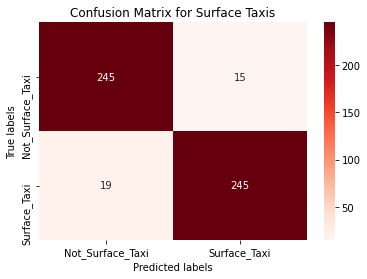

In [61]:
cm2 = metrics.confusion_matrix(y2_test, y2_pred_LR)    # Create a confusion matrix from predicted y and original y value.
                                                    
#sns.heatmap(cm,annot=True,cmap='Reds',fmt='.0f')    # Bring heatmap from seaborn and fit confusion matrix
                                                    # annot = True can show the confusion matrix values
                                                    # cmap can decide the color of heatmap
                                                    # fmt can decide the type of presentation of confusion matrix values
            
ax2= plt.subplot()
sns.heatmap(cm2, annot=True, cmap = 'Reds', fmt='.0f', ax=ax2);  

# labels, title and ticks
ax2.set_xlabel('Predicted labels');ax2.set_ylabel('True labels'); 
ax2.set_title('Confusion Matrix for Surface Taxis')
ax2.xaxis.set_ticklabels(['Not_Surface_Taxi', 'Surface_Taxi']); ax2.yaxis.set_ticklabels(['Not_Surface_Taxi', 'Surface_Taxi']);

In [62]:
y2_pred_proba = LR2.predict_proba(x2_test)   # Get the probability of LR classification 
                                          
false_positive_rate2, true_positive_rate2, thresholds2 = metrics.roc_curve(y2_test, y2_pred_proba[:,1])     
# Orignally predict_proba returned 2 values for both classes. 
# So, we picked second one which gives the probability of class 1

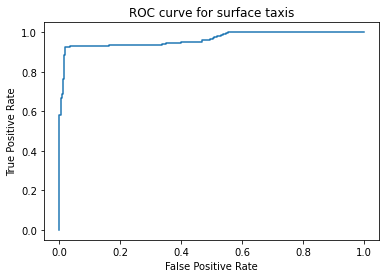

In [94]:
# Plot ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve for surface taxis')
plt.plot(false_positive_rate2, true_positive_rate2)  


In [95]:
# Compute AUC
auc2 = metrics.auc(false_positive_rate2, true_positive_rate2)   # metrics also provide the auc area
print("AUC for surface taxis (LR) =", auc2)

AUC for surface taxis (LR) = 0.9638111888111888


# HOVER TAXIS ##

In [66]:
# Dataframe labeling for Hover Taxis
df_h = df_norm.copy()
df_h['hover'] = 0

df_h.loc[(df_h['datetime'].between('2022-09-19 21:57:07' , '2022-09-19 21:59:20' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-19 22:08:15' , '2022-09-19 22:10:24' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:28:44' , '2022-09-20 20:30:06' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:30:31' , '2022-09-20 20:32:16' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:32:39' , '2022-09-20 20:34:06' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:34:50' , '2022-09-20 20:36:51' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-22 21:20:41' , '2022-09-22 21:23:56' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-22 21:28:35' , '2022-09-22 21:29:46' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-22 21:44:09' , '2022-09-22 21:45:31' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-10-06 13:56:43' , '2022-10-06 14:00:40' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-10-20 21:42:00' , '2022-10-20 21:46:30' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-10-20 21:50:00' , '2022-10-20 21:52:05' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-10-20 21:54:00' , '2022-10-20 21:56:45' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-10-20 21:58:00' , '2022-10-20 22:00:08' , inclusive='both')),['hover']] = 1


In [67]:
df_h['hover'].value_counts()

0    9006
1    1944
Name: hover, dtype: int64

In [68]:
X3 = df_h[model_features]
y3 = df_h['hover']

In [69]:
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3, random_state = 100)

In [70]:
LR3 = LogisticRegression()    # Bring empty logistic regression model

In [71]:
LR3.fit(x3_train,y3_train)      # Train the model with training data

LogisticRegression()

In [72]:
y3_pred_LR = LR3.predict(x3_test)    # Get predicted y from the logistic regression model

In [73]:
# Get the classification accuracy, Recall, and Precision with the metrics function.
LR3_accuracy = metrics.accuracy_score(y3_pred_LR,y3_test)
print('Classification accuracy = ',LR3_accuracy)
print('Recall = ',metrics.recall_score(y3_test, y3_pred_LR))
print('Precision = ',metrics.precision_score(y3_test, y3_pred_LR))

Classification accuracy =  0.8295281582952816
Recall =  0.08635578583765112
Precision =  0.6172839506172839


In [74]:
# Check the train data

total = 0
h = 0
non_h = 0
for i in y3_train:
    if i == 1:
        h += 1
    else:
        non_h += 1
    total += 1

In [75]:
print(h)
print(non_h)
print(round(non_h/total,2))

1365
6300
0.82


Create a balanced dataset & train Logistic regression

In [77]:
df_h_train = df_h[df_h['hover']==1]           # The original rows that have label 1
non_df_h_train = df_h[df_h['hover']==0]       # The original rows that have label 0

In [78]:
print(len(df_h_train))
print(len(non_df_h_train))

1944
9006


In [79]:
sampled_non_df_h = non_df_h_train.sample(n = 1944)    # Sample 1944 data points from the hover taxi data

In [80]:
print(len(df_h_train))
print(len(sampled_non_df_h))

1944
1944


In [81]:
merged3 = pd.concat([df_h_train, sampled_non_df_h])     # After balancing, concatenating  both classes into 1 dataframe

In [82]:
print(len(merged3))

3888


In [83]:
merged3

,index,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,...,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,hover
2955,0.129976,2022-09-19 21:57:07,0.620593,0.520431,0.001074,0.707232,0.673646,3.799078e-02,0.037993,0.509500,...,0.0,0.426301,0.647028,0.350176,0.525807,0.411964,0.522649,0.417270,0.417270,1
2956,0.130382,2022-09-19 21:57:08,0.620593,0.520431,0.001071,0.706727,0.673142,3.938552e-02,0.039366,0.521507,...,0.0,0.446156,0.638977,0.354125,0.527228,0.434687,0.525507,0.423082,0.423082,1
2957,0.130788,2022-09-19 21:57:09,0.620593,0.520431,0.001167,0.708063,0.674477,4.100958e-02,0.041006,0.525442,...,0.0,0.510974,0.639586,0.359472,0.527555,0.439648,0.524512,0.422523,0.422523,1
2958,0.131194,2022-09-19 21:57:10,0.620593,0.520431,0.001286,0.709390,0.675803,4.317065e-02,0.043163,0.524187,...,0.0,0.556951,0.636823,0.375970,0.527612,0.445098,0.523032,0.419814,0.419814,1
2959,0.131600,2022-09-19 21:57:11,0.620592,0.520430,0.001399,0.712110,0.678522,4.611323e-02,0.046101,0.521596,...,0.0,0.672467,0.635268,0.378210,0.527487,0.451222,0.521737,0.417330,0.417330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,0.480910,2022-09-19 22:11:31,0.620533,0.520500,0.000096,0.207917,0.174545,5.648208e-07,0.000004,0.516598,...,0.0,0.500163,0.869177,0.534102,0.006373,0.325592,0.455381,0.314940,0.314940,0
788,0.320065,2022-09-19 20:24:50,0.603823,0.525623,0.000086,0.960542,0.926015,2.991291e-03,0.003003,0.421844,...,1.0,0.554307,0.654062,0.425588,0.447796,0.526915,0.470305,0.319675,0.319675,0
2559,0.489033,2022-09-19 20:58:31,0.607395,0.524763,0.048431,0.373986,0.339838,3.311122e-01,0.331016,0.575926,...,0.0,1.000000,0.603009,0.356535,0.393063,0.826585,0.419327,0.266524,0.266524,0
5128,0.326158,2022-09-20 20:41:54,0.606865,0.524814,0.000007,0.820794,0.786439,5.523226e-05,0.000057,0.427389,...,1.0,0.464067,0.672764,0.427993,0.000768,0.420710,0.175331,0.183658,0.183658,0


In [84]:
# Split the data into X and y
x3 = merged3[model_features]   
y3 = merged3['hover']

In [85]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.3, random_state = 0)

In [86]:
total = 0
h = 0
non_h = 0
for i in y3_train:
    if i == 1:
        h += 1
    else:
        non_h += 1
    total += 1
    
print(h)
print(non_h)
print(non_h/total)

1360
1361
0.5001837559720691


In [87]:
LR3 = LogisticRegression()
LR3.fit(x3_train,y3_train)
y3_pred_LR = LR3.predict(x3_test)

LR3_accuracy = metrics.accuracy_score(y3_pred_LR,y3_test)
print('Hover Taxi Accuracy = ',LR3_accuracy)
print('Recall = ',metrics.recall_score(y3_test, y3_pred_LR))
print('Precision = ',metrics.precision_score(y3_test, y3_pred_LR))

Hover Taxi Accuracy =  0.8406169665809768
Recall =  0.9571917808219178
Precision =  0.7763888888888889


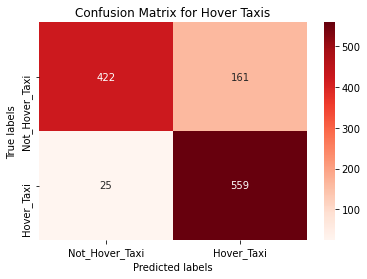

In [88]:
cm3 = metrics.confusion_matrix(y3_test, y3_pred_LR)    # Create a confusion matrix from predicted y and original y value.
                                                    
#sns.heatmap(cm,annot=True,cmap='Reds',fmt='.0f')    # Bring heatmap from seaborn and fit confusion matrix
                                                    # annot = True can show the confusion matrix values
                                                    # cmap can decide the color of heatmap
                                                    # fmt can decide the type of presentation of confusion matrix values
            
ax3= plt.subplot()
sns.heatmap(cm3, annot=True, cmap = 'Reds', fmt='.0f', ax=ax3);  
# labels, title and ticks
ax3.set_xlabel('Predicted labels');ax3.set_ylabel('True labels'); 
ax3.set_title('Confusion Matrix for Hover Taxis')
ax3.xaxis.set_ticklabels(['Not_Hover_Taxi', 'Hover_Taxi']); ax3.yaxis.set_ticklabels(['Not_Hover_Taxi', 'Hover_Taxi']);

In [89]:
y3_pred_proba = LR3.predict_proba(x3_test)   # Get the probability of LR classification (replace with other classifier results as needed)
                                          
false_positive_rate3, true_positive_rate3, thresholds3 = metrics.roc_curve(y3_test, y3_pred_proba[:,1])     
# Orignally predict_proba returned 2 values for both classes. 
# So, we picked second one which gives the probability of class 1

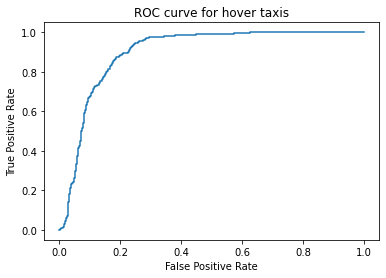

In [98]:
# Plot ROC curve 
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve for hover taxis')
plt.plot(false_positive_rate3, true_positive_rate3)  


In [96]:
# Compute AUC
auc3 = metrics.auc(false_positive_rate3, true_positive_rate3)   # metrics also provide the auc area
print("AUC curve for hover taxis (LR) =", auc3)

AUC curve for hover taxis (LR) = 0.8989402946497802
